In [19]:
import pandas as pd

# Read the CSV files
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# Display the first few rows of each DataFrame
print("Customers DataFrame:")
print(customers.head())

print("\nProducts DataFrame:")
print(products.head())

print("\nTransactions DataFrame:")
print(transactions.head())

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00

In [20]:
print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [21]:
print("\nTransactions Info:")
print(transactions.info())


Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


Check for the missing values

In [22]:
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [24]:
#  Convert columns to appropriate data types
from datetime import datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [25]:
# Check for duplicates and remove them
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [60]:
# Merge datasets for comprehensive analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')

# Summary statistics
print("\nMerged Data Summary:")
print(merged_data.columns)
print(merged_data.count)


Merged Data Summary:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
<bound method DataFrame.count of     TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998

In [61]:
# Check for missing rows and values in merged_data
missing_values = merged_data.isnull().sum()
print("Missing Values in Merged Data:")
print(missing_values)

# Check for any missing rows
missing_rows = merged_data[merged_data.isnull().any(axis=1)]
print("\nRows with Missing Values in Merged Data:")
print(missing_rows)

Missing Values in Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Rows with Missing Values in Merged Data:
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price_x, CustomerName, Region, SignupDate, ProductName, Category, Price_y]
Index: []


In [59]:
print(merged_data.describe())


                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_18472\1177005154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_18472\1177005154.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, value + 1, f'{percentages[i]:.2f}%', ha='center')


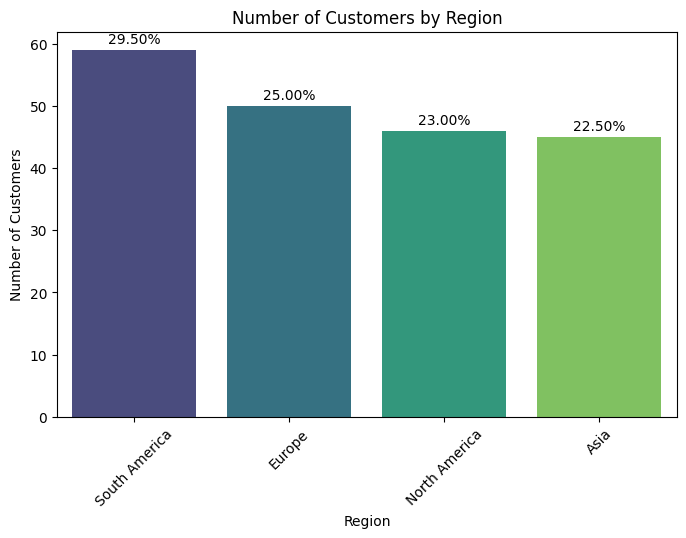

In [54]:
# 1. Customer Analysis
# Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

# Calculate percentage contribution
total_customers = region_counts.sum()
percentages = (region_counts / total_customers) * 100

# Annotate bars with percentage values
for i, value in enumerate(region_counts):
    plt.text(i, value + 1, f'{percentages[i]:.2f}%', ha='center')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18472\1877345028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='plasma')


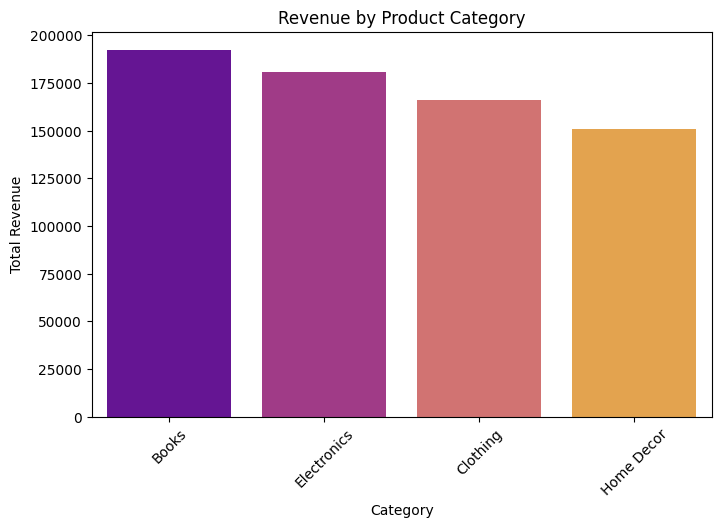

In [29]:
# 2. Product Analysis
# Top-selling product categories
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='plasma')
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

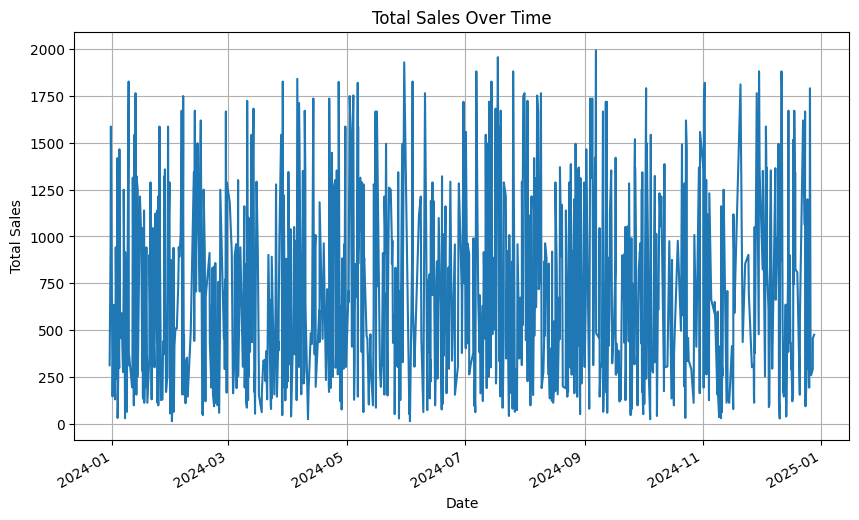

In [30]:
# 3. Transactions Analysis
# Total sales over time
daily_sales = merged_data.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


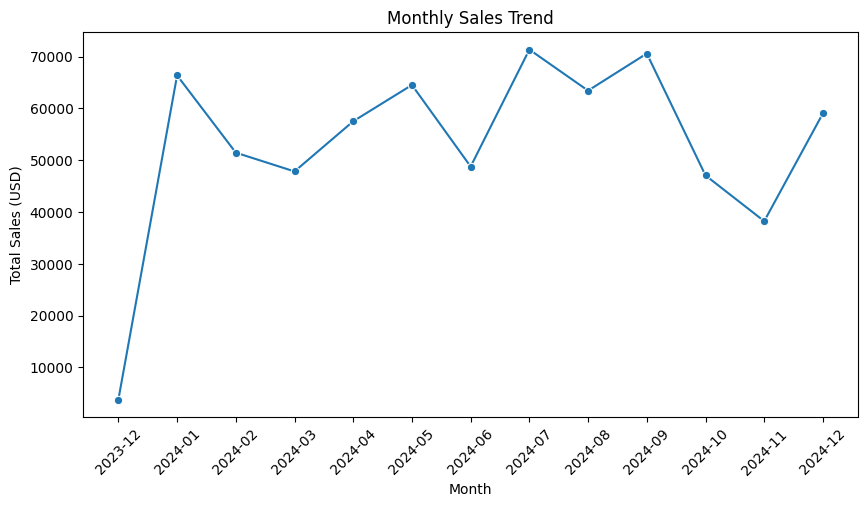

In [36]:
# 4. Monthly Sales Trend
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.index = monthly_sales.index.astype(str)  # Convert to string for proper plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_18472\74123688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')


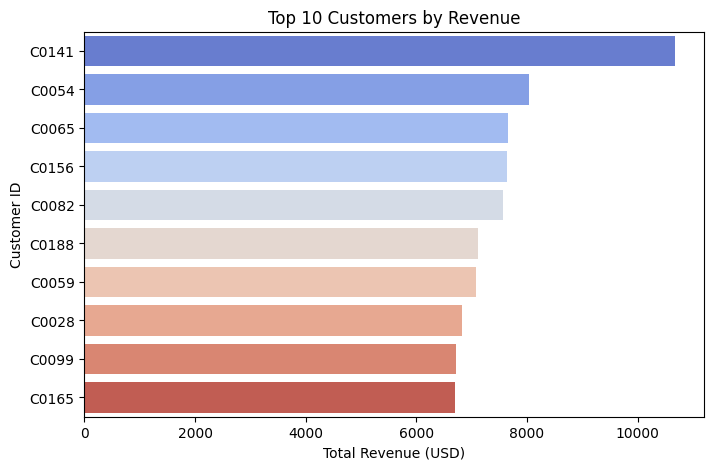

In [37]:
# 5. Top 10 Customers by Revenue
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.show()


Bussiness Insights

In [38]:
# 1. Regional Revenue Contribution
regional_revenue = merged_data.groupby('Region')['TotalValue'].sum()
total_revenue = regional_revenue.sum()
top_region = regional_revenue.idxmax()
top_region_percentage = (regional_revenue[top_region] / total_revenue) * 100
print(f"1. The highest revenue comes from the {top_region} region, contributing "
      f"{regional_revenue[top_region]:.2f} USD, which is {top_region_percentage:.2f}% of the total revenue.")


1. The highest revenue comes from the South America region, contributing 219352.56 USD, which is 31.79% of the total revenue.


In [39]:
# 2. Top Customers
print("4. Top 3 customers contributing the most revenue:")
for idx, value in top_customers.head(3).items():
    percentage_contribution = (value / total_revenue) * 100
    print(f"   - CustomerID {idx}: {value:.2f} USD ({percentage_contribution:.2f}%)")



4. Top 3 customers contributing the most revenue:
   - CustomerID C0141: 10673.87 USD (1.55%)
   - CustomerID C0054: 8040.39 USD (1.17%)
   - CustomerID C0065: 7663.70 USD (1.11%)


In [47]:

best_category_contribution = category_sales[best_category]
percentage_contribution = (best_category_contribution / total_revenue) * 100
print(f"The best-performing product category '{best_category}' contributes {percentage_contribution:.2f}% to the total revenue.")


The best-performing product category 'Books' contributes 27.85% to the total revenue.


In [34]:

# 4. Seasonal sales trend
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.month)['TotalValue'].sum()
peak_month = monthly_sales.idxmax()
print(f"4. Sales peak in month {peak_month}, indicating high seasonal demand.")

4. Sales peak in month 7, indicating high seasonal demand.


In [53]:
# 5. Least performing category
least_category = category_sales.idxmin()
print(f"5. The least-performing product category is '{least_category}', suggesting a need for promotional strategies.")

5. The least-performing product category is 'Home Decor', suggesting a need for promotional strategies.
